In [1]:
%cd ../../..

/workspaces/Code


In [2]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
from dataclasses import dataclass
import numpy as np
import glob
from PIL import Image
from IPython.display import display
from vector import Vector2D

In [3]:
class ImageData:
    file: str
    label: str
    weight: str
    point: Vector2D
    image: np.ndarray

    def __init__(self, file):
        self.file = file
        self.image = np.asarray(Image.open(file))
        self._parseName(file)

    def _parseName(self, file: str):
        file_name = file.split("/")[-1].split(".png")[0]
        parts = file_name.split("-")

        self.label = parts[0]
        if "anchor" in file:
            self.point = self._to_vector(parts[1])
            return
        
        self.weight = parts[1]
        self.point = self._to_vector(parts[2])

    def _to_vector(self, value: str) -> Vector2D:
        x, y = value.strip("()").split(",")
        return Vector2D(int(x), int(y))


@dataclass
class RecallSample:
    anchor: ImageData
    tops: list[ImageData]

    def __init__(self, label: str, files: list[str]):
        self.label = label
        print(label)

        self.tops = []
        for file in files:
            if "anchor" in file:
                self.anchor = ImageData(file)
                continue
            
            if "top" in file:
                self.tops.append(ImageData(file))

(1760, 1784)


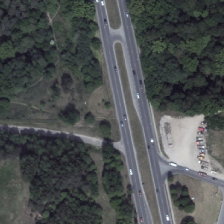

(1790, 3292)


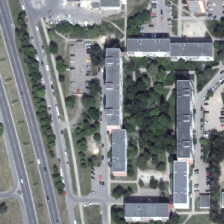

(1838, 4591)


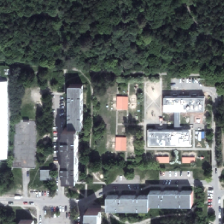

(1916, 455)


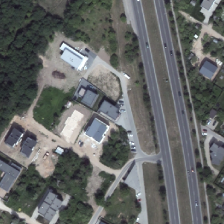

(3124, 3237)


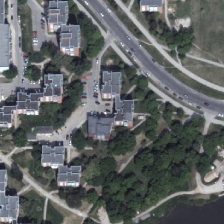

(3205, 1848)


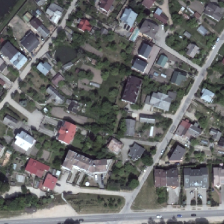

(3267, 4637)


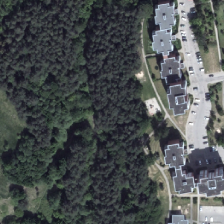

(3277, 378)


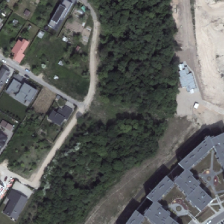

(356, 1770)


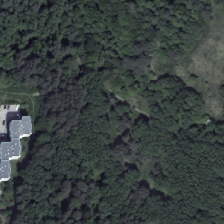

(423, 3246)


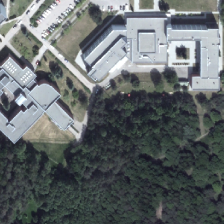

(4454, 379)


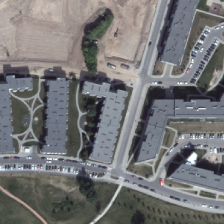

(454, 4661)


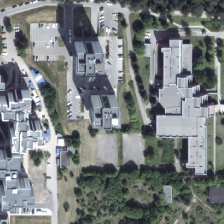

(4576, 3348)


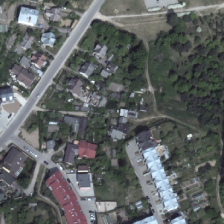

(4603, 4652)


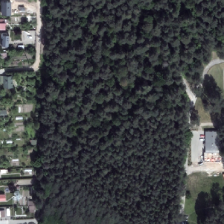

(4653, 1710)


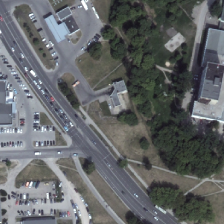

(484, 341)


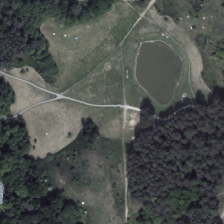

In [8]:
#path = "Data/Experimental/NewTraining/EfficientNetB2/nn59-train59-id64-od8-e6-b16/Recall"
path = "Data/Experimental/NewTraining/ResNet50/nn50-train50-id128-od8-e6-b16/Recall"
# path = "Data/Experimental/NewTraining/VGG16/nn14-train14-id64-od8-e6-b4/Recall"

dirs = sorted(glob.glob(f"{path}/*/"))
samples = []

for dir in dirs:
    label = dir.replace(path, "").strip('/')
    files = glob.glob(f"{dir}/*.png")

    sample = RecallSample(label, files)
    samples.append(sample)

    display(Image.fromarray(sample.anchor.image))

In [11]:
def plot_graph(samples: list[RecallSample]):
    fig = plt.figure(figsize=(12, 10))
    sample_len = len(samples)
    top_len = len(samples[0].tops)

    grid = gridspec.GridSpec(sample_len, top_len + 2)

    for sample_index in range(sample_len):
        anchor = samples[sample_index].anchor

        ax = fig.add_subplot(grid[sample_index,0])
        ax.imshow(anchor.image)
        ax.axis('off')

        for top_index in range(top_len):
            top = samples[sample_index].tops[top_index]
            dist = anchor.point.distance_to(top.point) * 0.3045634921 #m/px

            title = f"{dist:.2f} m".replace(".", ",")

            ax = fig.add_subplot(grid[sample_index, top_index + 2], title=title)
            ax.imshow(top.image)
            ax.axis('off')

    plt.savefig('Data/recommendation_system-good.png', dpi=300, bbox_inches='tight', facecolor='w')
    plt.show()

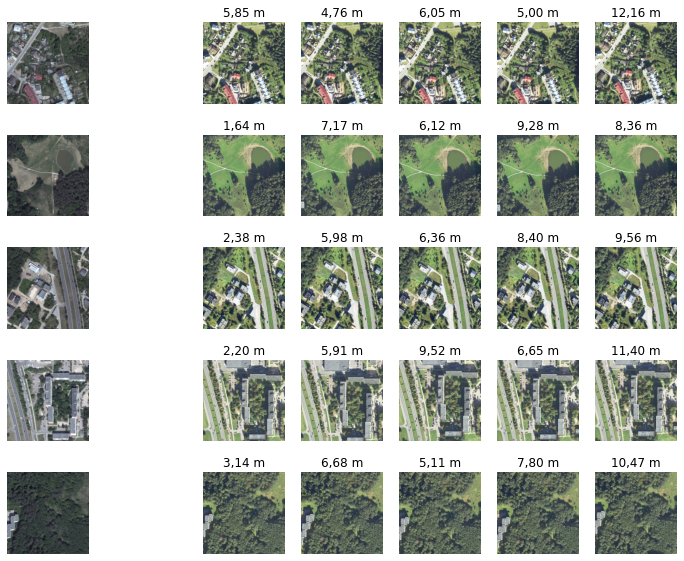

In [12]:
samples_to_show = np.array(samples)[[12, 15, 3, 1, 8]]

plot_graph(samples_to_show)